In [1]:
import control

In [2]:
import jupyter_dash
from jupyter_dash import JupyterDash
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

In [3]:
Gz = control.TransferFunction([1,0.4],[1, -1.2, 0.35], 2)
Gz

TransferFunction(array([1. , 0.4]), array([ 1.  , -1.2 ,  0.35]), 2)

In [4]:
control.feedback(Gz)

TransferFunction(array([1. , 0.4]), array([ 1.  , -0.2 ,  0.75]), 2)

In [5]:
T, yout = control.step_response(Gz)

In [6]:
list_of_tuples = list(zip(T, yout))

In [7]:
df = pd.DataFrame(list_of_tuples, columns = ['Tempo', 'Valor'])

In [8]:
df

,Tempo,Valor
0,0.0,0.000000
1,2.0,1.000000
2,4.0,2.600000
3,6.0,4.170000
4,8.0,5.494000
5,10.0,6.533300
6,12.0,7.317060
7,14.0,7.893817
8,16.0,8.311609
9,18.0,8.611095


In [9]:
fig = px.line(df, x = "Tempo", y='Valor')

In [10]:
fig

In [11]:
control.poles(Gz)

array([0.7+0.j, 0.5+0.j])

In [12]:
control.zeros(Gz)

array([-0.4+0.j])

In [13]:
import math

In [14]:
tetap1 = math.pi - math.atan((0.64/0.34))

In [15]:
tetap2 = math.pi - math.atan((0.64/(0.5-0.36)))

In [16]:
tetaz1 = math.atan((0.64/(0.4+0.36)))

In [17]:
tetap1 + tetap2 -tetaz1

3.1453914346246927

In [18]:
import numpy as np

In [19]:
x = np.arange(-2,2,0.1)

In [20]:
#%matplotlib widget

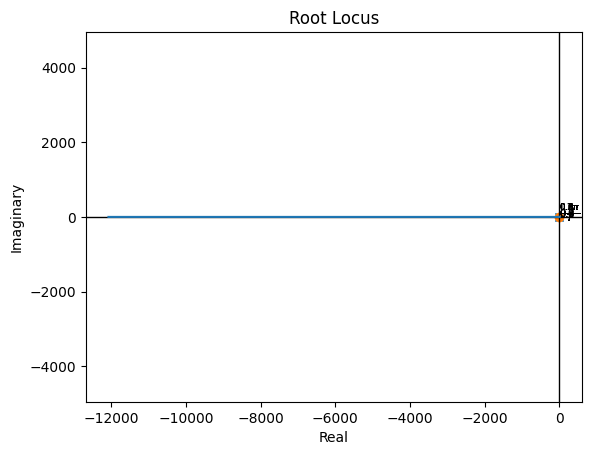

In [21]:
control.rlocus(Gz);

In [22]:
zcorte = -0.2124831 + 0.9771580j

In [23]:
abs(zcorte)

0.9999934123531065

In [24]:
zcorte.real

-0.2124831

In [25]:
rp0_7 = math.sqrt((zcorte.imag**2)+(0.7-zcorte.real)**2) 
rp0_7

1.3369604200385328

In [26]:
rp0_5 = math.sqrt((zcorte.imag**2)+(0.5-zcorte.real)**2) 
rp0_5

1.2093262275951886

In [27]:
rz0_4 = math.sqrt((zcorte.imag**2)+(0.4+zcorte.real)**2) 
rz0_4

0.9949876103498023

In [28]:
K = (rp0_5*rp0_7)/rz0_4
K

1.6249662652993846

In [44]:
T1, yout1 = control.step_response(control.feedback((K-0.2)*Gz))

In [30]:
import matplotlib.pyplot as plt

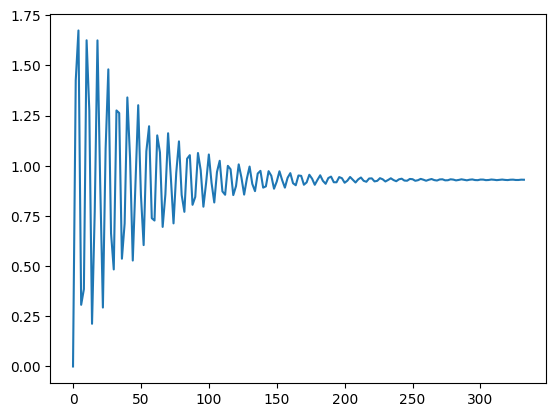

In [45]:
plt.plot(T1, yout1)

In [32]:
list_of_tuples1 = list(zip(T1, yout1))

In [33]:
df1 = pd.DataFrame(list_of_tuples1, columns = ['Tempo', 'Valor'])

In [34]:
fig = px.line(df, x = "Tempo", y='Valor')